In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class BSPNode:
    def __init__(self, x, y, w, h):
        self.x = x
        self.y = y
        self.w = w
        self.h = h
        self.left = None
        self.right = None
        self.parent = None
        self.room = None
        self.split = None
        
    def create_room(self):
        room_width = np.random.randint(self.w // 4, self.w)
        room_height = np.random.randint(self.h // 4, self.h)
        room_x = np.random.randint(self.x, self.x + (self.w  -  room_width))
        room_y = np.random.randint(self.y, self.y + (self.h - room_height))
        self.room = (room_x, room_y, room_width, room_height)
        
    def connect_rooms(self):
        if self.left and self.right:
            connect_rooms(self.left)
            connect_rooms(self.right)
        if self.left.room and self.right.room:
            connect_two_rooms(self.left.room, self.right.room)

In [28]:
class BSPGenerator:
    def __init__(self, w, h, min_w=None, min_h=None, corridor_w=5):
        self.w = w
        self.h = h
        self.min_w = min_w if min_w is not None else w // 3
        self.min_h = min_h if min_h is not None else h // 3
        self.array = np.zeros((h, w))
        self.rooms = []
        self.nodes = []
        self.corridor_w = 5

    def generate_dungeon(self):
        self.root = BSPNode(0, 0, self.w, self.h)
        self.bsp_tree_recursive(self.root)
        # connect_rooms(root)
        self.generate_array()
        return self.array

    def bsp_tree_recursive(self, node: BSPNode):
        self.nodes.append(node)
        if node.w < self.min_w or node.h < self.min_h:
            node.create_room()
            self.rooms.append(node.room)
            return
    
        split_way = np.random.choice(['h', 'v'])
        if split_way == 'h':
            self.split_horizontally(node)
        elif split_way == 'v':
            self.split_vertically(node)
        
        node.split = split_way
        
        self.bsp_tree_recursive(node.left)
        self.bsp_tree_recursive(node.right)
        
    def generate_array(self):
        for (room_x, room_y, room_w, room_h) in self.rooms:
            self.array[room_y: room_y+room_h, room_x: room_x+room_w] = 1
            

    def split_horizontally(self, node: BSPNode):
        split = np.random.randint(self.min_w//2, node.w - self.min_w//2)
        node.left = BSPNode(node.x,          node.y, split,              node.h)
        node.left.parent = node
        node.right = BSPNode(node.x + split, node.y, node.w - split, node.h)
        node.right.parent = node

    def split_vertically(self, node: BSPNode):
        split = np.random.randint(self.min_h//2, node.h - self.min_h//2)
        node.left = BSPNode(node.x, node.y, node.w, split)
        node.right = BSPNode(node.x, node.y + split, node.w, node.h - split)


def connect_two_rooms(room1, room2):
    x1, y1, w1, h1 = room1
    x2, y2, w2, h2 = room2
    cx1 = np.random.randint(x1, x1 + w1)
    cx2 = np.random.randint(x2, x2 + w2)
    cy1 = np.random.randint(y1, y1 + h1)
    cy2 = np.random.randint(y2, y2 + h2)
    
    if np.random.rand() > 0.5:
        corridors = [(cx1, cy1), (cx1, cy2), (cx2, cy2)]
    else:
        corridors = [(cx1, cy1), (cx2, cy1), (cx2, cy2)]
    
    for corridor in corridors:
        if corridor[0] != cx1:
            connect_horizontal(corridor[0], cx1, corridor[1])
        if corridor[0] != cx2:
            connect_horizontal(corridor[0], cx2, corridor[1])
        if corridor[1] != cy1:
            connect_vertical(corridor[1], cy1, corridor[0])
        if corridor[1] != cy2:
            connect_vertical(corridor[1], cy2, corridor[0])
            

def connect_horizontal(x1, x2, y):
    for x in range(min(x1, x2), max(x1, x2) + 1):
        dungeon[y, x] = 1


def connect_vertical(y1, y2, x):
    for y in range(min(y1, y2), max(y1, y2) + 1):
        dungeon[y, x] = 1

def display_dungeon(dungeon):
    for row in dungeon:
        for cell in row:
            if cell == 1:
                print("#", end="")
            else:
                print(".", end="")
        print()

def plot_dungeon(dungeon):
    plt.imshow(dungeon, cmap='gray')


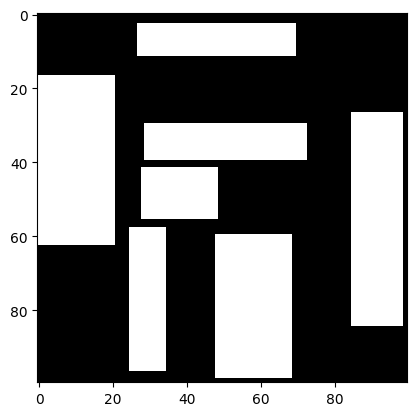

In [29]:
# Example usage
w, h = 100, 100

bspg = BSPGenerator(w, h)
dungeon = bspg.generate_dungeon()

plot_dungeon(dungeon)

In [ ]:
for node in bspg.nodes:
    print(node.h, node.w)

100 100
100 29
68 29
40 29
